In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_data= pd.read_csv(r"D:\Projects\instagram_pa\datasets\d2\train.csv");
test_data= pd.read_csv(r"D:\Projects\instagram_pa\datasets\d2\test.csv");
#df.head()

In [3]:
train_data.describe()
test_data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [4]:
train_data.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

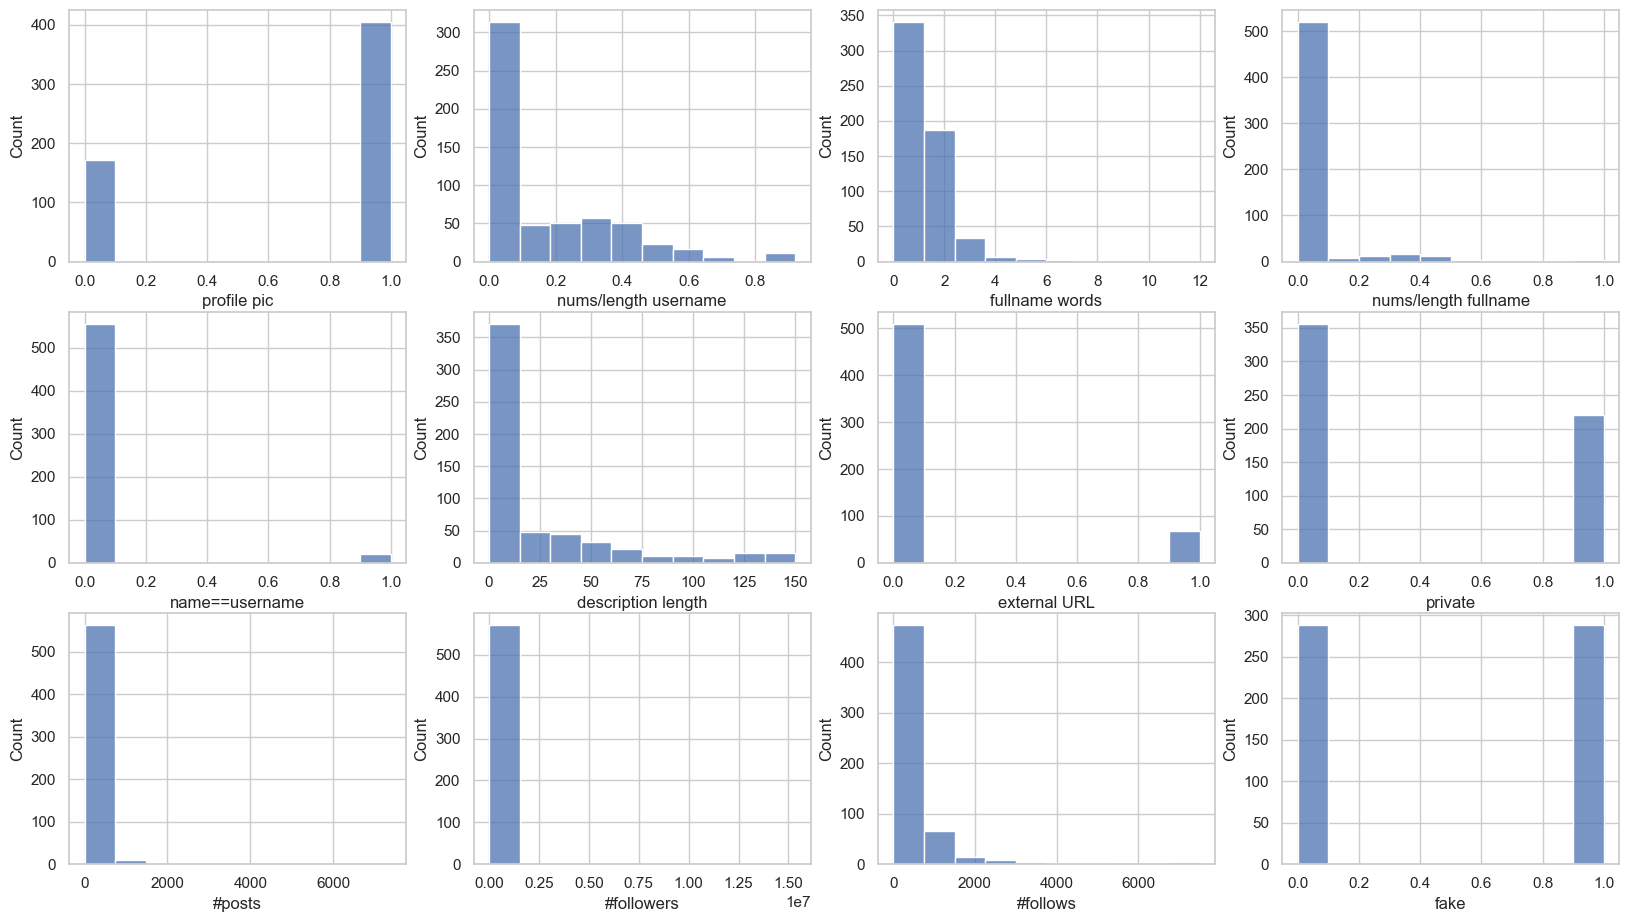

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np  

sns.set(style="whitegrid")

column_names = train_data.columns
# List of features
features = list(column_names)

# Plot histograms for each feature with NaN handling
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    df_clean = train_data[feature].replace([np.inf, -np.inf], np.nan)  # Replace inf and -inf with NaN
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_clean, kde=False, bins=10)

plt.show()

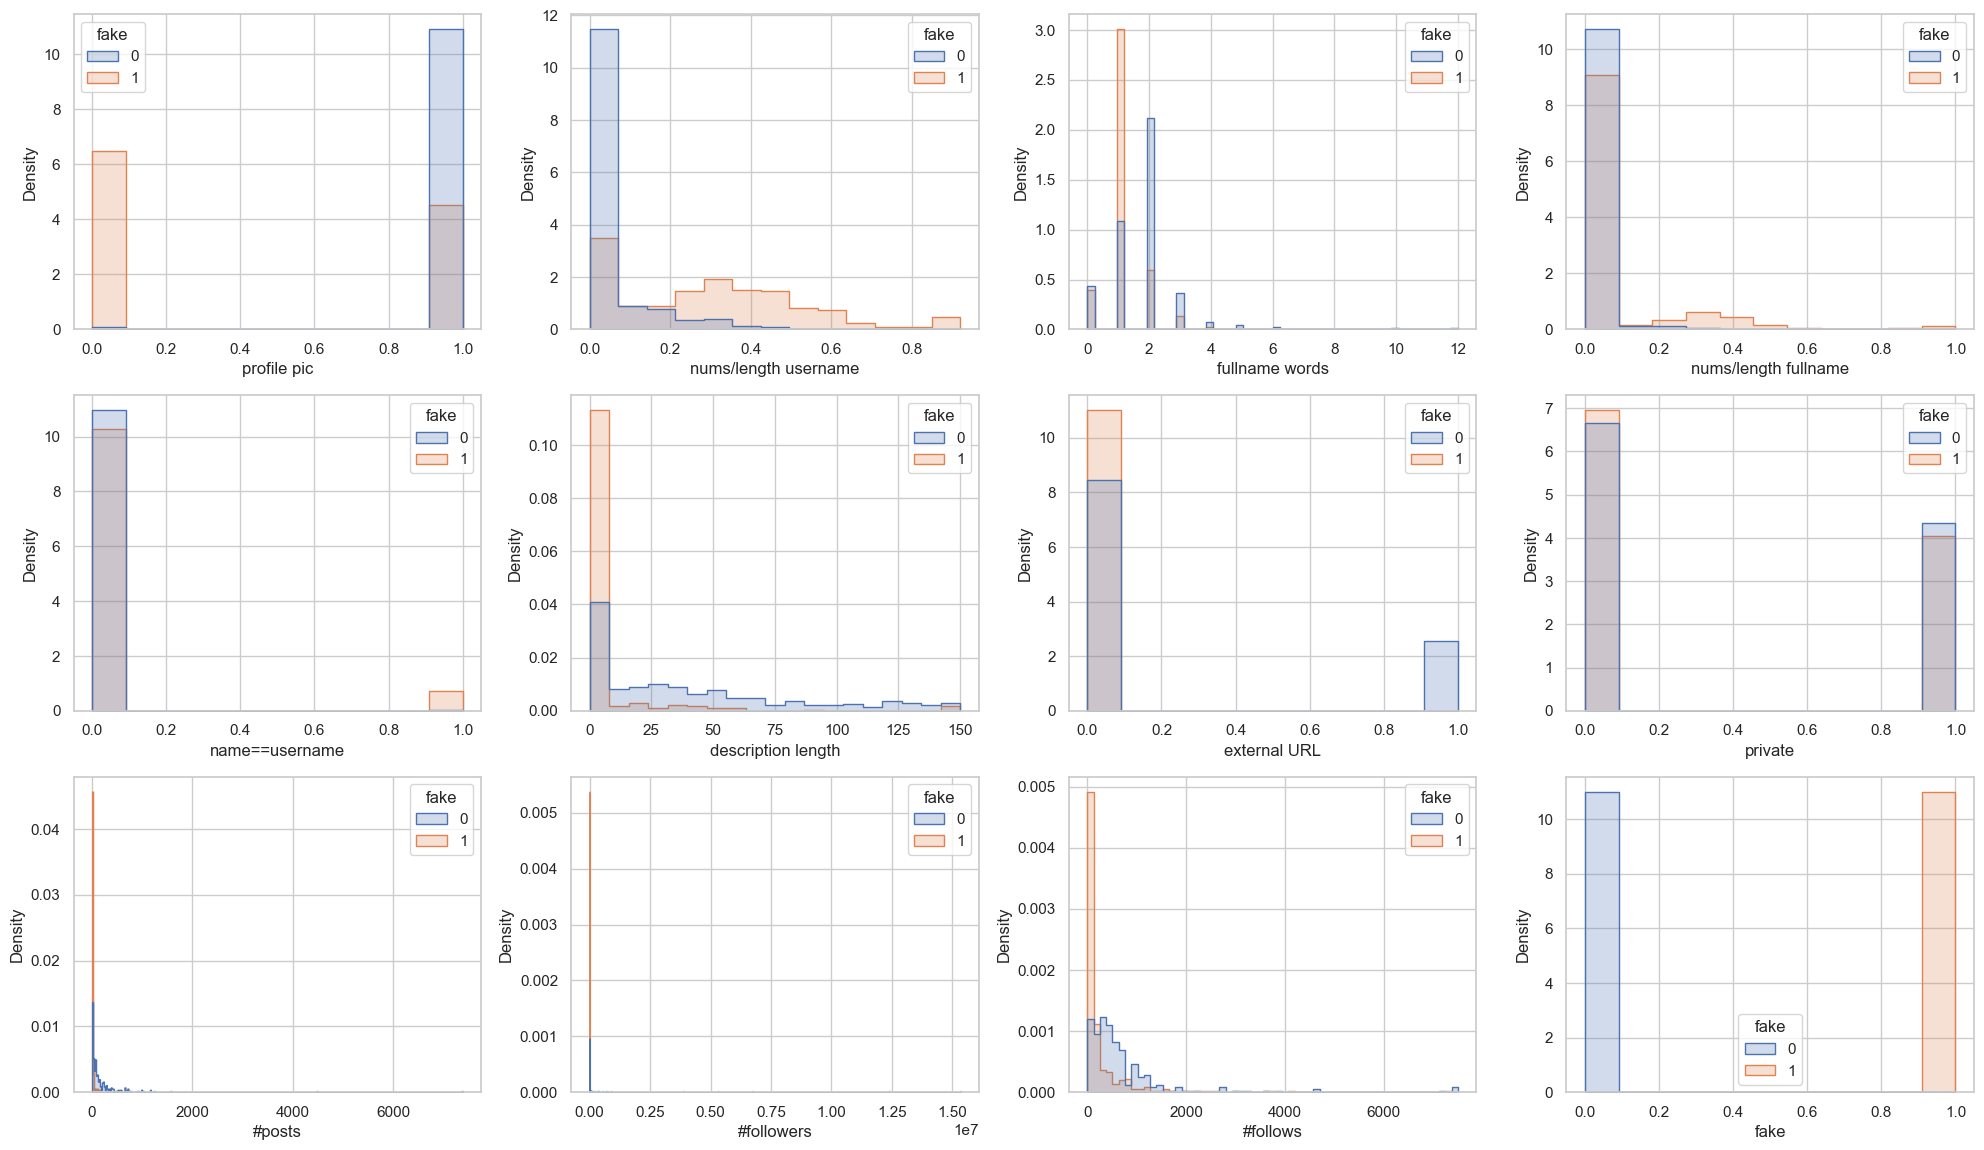

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np  # Import numpy for NaN (from previous code)


# Plot the distribution of each feature with respect to the target variable 'fake'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(
        data=train_data,  # Use train_data instead of df
        x=feature,
        hue="fake",  # Use quotes for clarity
        element="step",
        stat="density",
        common_norm=False
    )
plt.tight_layout()
plt.show()

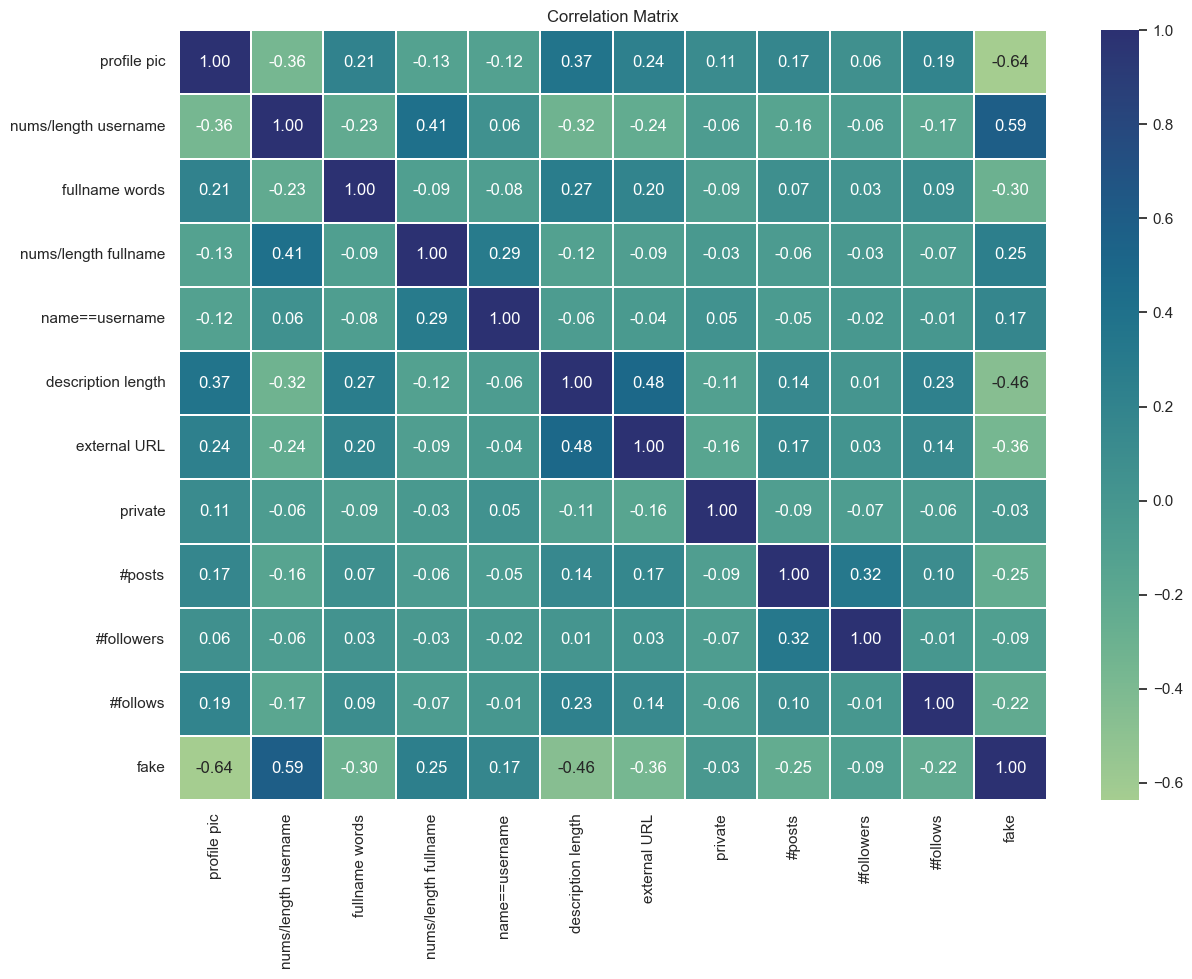

In [7]:
# Calculate the correlation matrix
corr_matrix = train_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=0.2)
plt.title("Correlation Matrix")
plt.show()

# ELM

In [54]:
X2_train = train_data.drop(["fake"],axis=1).values
y2_train = train_data["fake"].values.reshape(-1,1)
X2_test  = test_data.drop(["fake"],axis=1).values
y2_test  = test_data["fake"].values.reshape(-1,1)


In [55]:
# Standardize the features
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)


In [56]:
# input_length= X2_train.shape[1]
# hidden_units=10
# Win= np.random.normal(size=[input_length,hidden_units])
# Win.shape
from hpelm import ELM
from sklearn.metrics import accuracy_score
np.random.seed(42)


In [57]:
X2_train.shape[1]

11

In [103]:
elm = ELM(X2_train.shape[1], 1,'c')  
elm.add_neurons(73, "sigm")  
elm.train(X2_train, y2_train)  



In [104]:
y_pred = elm.predict(X2_test)
y_pred = np.clip(y_pred, 0, 1) 
y_pred = np.round(y_pred).flatten()  


In [105]:
accuracy = accuracy_score(y2_test, y_pred)
print(f"ELM Accuracy: {accuracy:.4f}")

ELM Accuracy: 0.9250


Confusion matrix if > 90 % accuracy


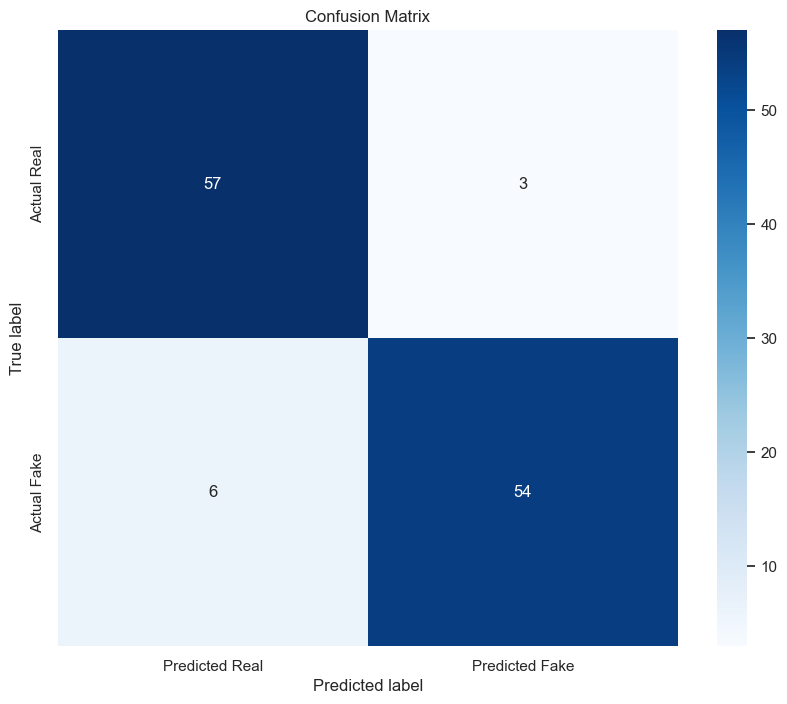

In [106]:
cm = confusion_matrix(y2_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Real', 'Predicted Fake'],
            yticklabels=['Actual Real', 'Actual Fake'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


comparative study with other models : svm, random forest, bayesian, do new graphs, do statistic analysis, accuracies, deep learning, DNN

check other paramters of measure from other classification papers and whether LLMS can be implemented

# SVM

In [107]:
X2_train = train_data.drop(["fake"],axis=1).values
y2_train = train_data["fake"].values.reshape(-1,1)
X2_test  = test_data.drop(["fake"],axis=1).values
y2_test  = test_data["fake"].values.reshape(-1,1)

In [108]:
from sklearn.svm import SVC

In [109]:
# Flatten y arrays (SVM expects 1D array for y)
y2_train = y2_train.ravel()
y2_test = y2_test.ravel()

# Feature Scaling (important for SVM)
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [110]:
# Create and train SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X2_train_scaled, y2_train)

SVC(random_state=42)

In [111]:
y_pred_svm = svm_classifier.predict(X2_test_scaled)


In [112]:
print("Accuracy:", accuracy_score(y2_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y2_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y2_test, y_pred_svm))

Accuracy: 0.8833333333333333

Confusion Matrix:
 [[56  4]
 [10 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        60
           1       0.93      0.83      0.88        60

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier


In [114]:
X2_train = train_data.drop(["fake"], axis=1).values
y2_train = train_data["fake"].values.reshape(-1,1)
X2_test = test_data.drop(["fake"], axis=1).values
y2_test = test_data["fake"].values.reshape(-1,1)

y2_train = y2_train.ravel()
y2_test = y2_test.ravel()

In [115]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    criterion='gini',  # Splitting criterion
    max_depth=None,    # No maximum depth (nodes expand until pure)
    min_samples_split=2,  # Minimum samples required to split a node
    min_samples_leaf=1,   # Minimum samples required at each leaf node
    random_state=42      # For reproducibility
)
rf_classifier.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [116]:
y_pred_rf = rf_classifier.predict(X2_test)


In [117]:
# Evaluate performance
print("Accuracy:", accuracy_score(y2_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y2_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y2_test, y_pred_rf))

Accuracy: 0.9166666666666666

Confusion Matrix:
 [[56  4]
 [ 6 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.93      0.90      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



# Bayesian Classification


In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:

X_train = train_data.drop("fake", axis=1).values
y_train = train_data["fake"].values
X_test = test_data.drop("fake", axis=1).values
y_test = test_data["fake"].values

# Standardize features (important for GaussianNB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
bayesian_model = GaussianNB(var_smoothing=1e-9)  # Default smoothing parameter
bayesian_model.fit(X_train_scaled, y_train)

GaussianNB()

In [121]:
# Make predictions
y_pred_bay = bayesian_model.predict(X_test_scaled)
y_prob_bay = bayesian_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

In [122]:
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bay):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bay))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bay))

Model Evaluation:
Accuracy: 0.6917

Confusion Matrix:
[[25 35]
 [ 2 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        60
           1       0.62      0.97      0.76        60

    accuracy                           0.69       120
   macro avg       0.77      0.69      0.67       120
weighted avg       0.77      0.69      0.67       120



# Comparing 4 Models Performance

In [123]:
acc_elm = accuracy_score(y_test, y_pred)
acc_bay = accuracy_score(y_test, y_pred_bay)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)

In [124]:
models = ['ELM', 'Gaussian Bayes', 'Random Forest', 'SVM']
accuracies = [acc_elm, acc_bay, acc_rf, acc_svm]
colors = ['Yellow', 'Orange', 'Red', 'Pink']

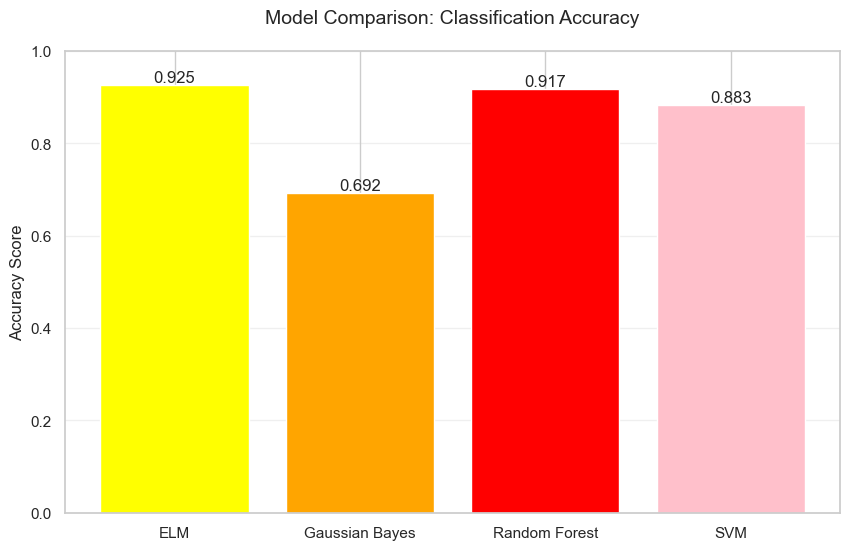

In [125]:
# Create figure
plt.figure(figsize=(10, 6))

# Bar plot
bars = plt.bar(models, accuracies, color=colors)
# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',   
             ha='center', va='bottom')

# Customize plot
plt.ylim(0, 1.00)  # Leave space for text above bars
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Model Comparison: Classification Accuracy', fontsize=14, pad=20)
plt.grid(axis='y', alpha=0.3)

plt.show()

## Receiver Operator Characteristic Curve

<Figure size 800x600 with 0 Axes>

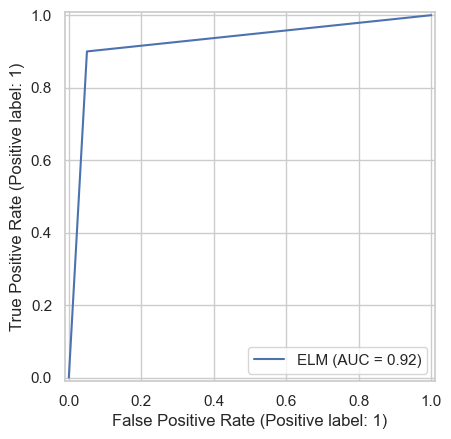

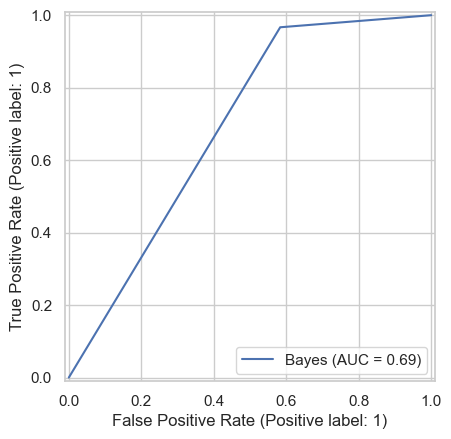

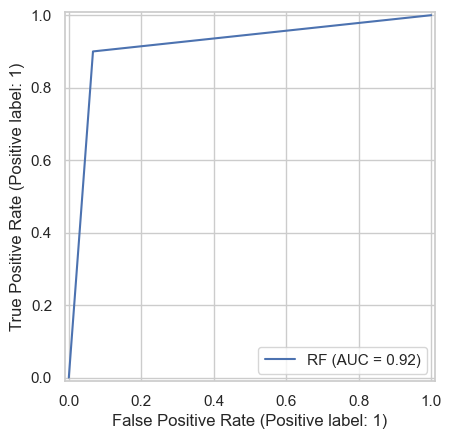

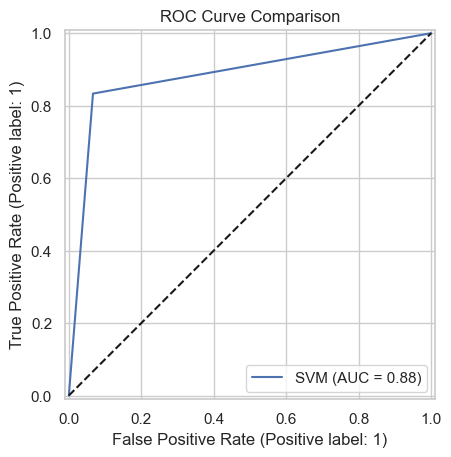

In [126]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,6))
for name, pred in [('ELM', y_pred), ('Bayes', y_pred_bay), 
                  ('RF', y_pred_rf), ('SVM', y_pred_svm)]:
    RocCurveDisplay.from_predictions(y_test, pred, name=name)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.show()

### Using LLM

In [127]:
import json
features
corr_matrix
data_for_llm={
    "column_names":features,
    "correlation_matrix":corr_matrix.to_dict()
}
with open('dataset_analysis.json', 'w') as f:
    json.dump(data_for_llm, f, indent=2)

print("Data prepared for LLM analysis.")

Data prepared for LLM analysis.


In [128]:
import ollama

# Read the prepared data
with open('dataset_analysis.json') as f:
    analysis_data = json.load(f)

# Create the prompt
prompt = f"""
I'm working with a dataset for binary classification with these columns: {analysis_data['column_names']}.

Here's the correlation matrix (values between -1 and 1):
{json.dumps(analysis_data['correlation_matrix'], indent=2)}

Please analyze:
1. Which features appear most strongly correlated with each other?
2. Any potential multicollinearity issues?
3. Which features likely have the highest predictive power for binary classification?
4. Any surprising negative correlations worth noting?
"""
system_prompt=f"""
You are a master data scientist analysing a data science project on Instagram Data on Fake Profiles and all Machine Learning Models.
"""

# Query Llama3
correlation_response = ollama.chat(
    model='llama3:latest',
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt}
    ]
)
print("Correlation Analysis:")


Correlation Analysis:


In [129]:
with open('correlation_response.txt', 'w', encoding='utf-8') as file:
    file.write(correlation_response["message"]["content"])

print("Response successfully written to correlation_response.txt")  

Response successfully written to correlation_response.txt


In [130]:
# Prepare model performance data
model_performance = {
    "ELM": accuracy_score(y_test, y_pred),
    "Gaussian_Bayes": accuracy_score(y_test, y_pred_bay),
    "Random_Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

# Create the prompt
performance_prompt = f"""
I've trained 4 models on binary classification with these accuracies:
{json.dumps(model_performance, indent=2)}

Please analyze:
1. Which model performed best and why this might be the case?
2. For the worst performing model, suggest potential improvements
3. Given these results, which model would you recommend for production?
4. What other metrics should I consider beyond accuracy?
"""

# Query Llama3
performance_response = ollama.chat(
    model='llama3:latest',
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": performance_prompt}
    ]
)
print("\nModel Performance Analysis:")



Model Performance Analysis:


In [131]:
with open('performance_response.txt', 'w', encoding='utf-8') as file:
    file.write(performance_response["message"]["content"])

print("Response successfully written to cperformance_response.txt")  

Response successfully written to cperformance_response.txt
